In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import image as img
from skimage import io, color
import numpy as np
import time

# Q1

In [38]:
#read image
meeseeks = cv2.imread('MeeSeeksHQ.png')

In [41]:
#convert into grayscale
meeseeks_gray = cv2.cvtColor(meeseeks, cv2.COLOR_BGR2GRAY)

In [42]:
meeseeks_gray.shape

(1028, 488)

In [46]:
meeseeks = cv2.resize(meeseeks, (400,950))
meeseeks_gray = cv2.resize(meeseeks_gray, (400,950))

In [47]:
#show original image and converted
cv2.imshow('Original image',meeseeks)
cv2.imshow('Gray image', meeseeks_gray)
cv2.waitKey(0)


-1

In [6]:
#save image
cv2.imwrite('gray.png',_meeseeksgray)

True

# Q2

In [ ]:
meeseeks = cv2.imread('mr meeskees.png')

determined_MeeseeksHQ = meeseeks
for index_x, row in enumerate(meeseeks):
    for index_y, pixel in enumerate(row):
        if not (83 < pixel[0] < 255 and 81 < pixel[1] < 255 and 10 < pixel[2] < 80):
            determined_MeeseeksHQ[index_x, index_y] = [0, 0, 0]



cv2.imshow("Recognized MeeSeeks", determined_MeeseeksHQ)
cv2.waitKey(0)

# Q3

# a

In [50]:
def extract_channels(img):
    h = img.shape[0]
    b = img[:int(h/3),:]
    g = img[int(h/3):int(2*h/3),:]
    r = img[int(2*h/3):h-1,:]
    return b,g,r

Text(0.5, 1.0, 'r')

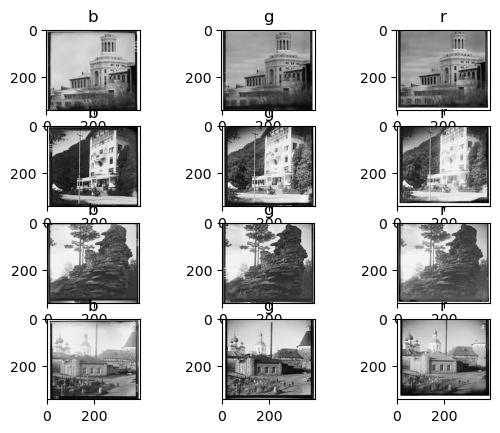

In [53]:
image = img.imread("01.jpg")
b,g,r = extract_channels(image)
fig, ax = plt.subplots(4,3)
ax[0,0].imshow(b, cmap="gray")
ax[0,1].imshow(g, cmap="gray")
ax[0,2].imshow(r, cmap="gray")
ax[0,0].set_title("b")
ax[0,1].set_title("g")
ax[0,2].set_title("r")

#### 02 ####
image = img.imread("02.jpg")
b,g,r = extract_channels(image)
ax[1,0].imshow(b, cmap="gray")
ax[1,1].imshow(g, cmap="gray")
ax[1,2].imshow(r, cmap="gray")
ax[1,0].set_title("b")
ax[1,1].set_title("g")
ax[1,2].set_title("r")

#### 03 ####
image = img.imread("03.jpg")
b,g,r = extract_channels(image)
ax[2,0].imshow(b, cmap="gray")
ax[2,1].imshow(g, cmap="gray")
ax[2,2].imshow(r, cmap="gray")
ax[2,0].set_title("b")
ax[2,1].set_title("g")
ax[2,2].set_title("r")

#### 04 #####
image = img.imread("04.jpg")
b,g,r = extract_channels(image)
ax[3,0].imshow(b, cmap="gray")
ax[3,1].imshow(g, cmap="gray")
ax[3,2].imshow(r, cmap="gray")
ax[3,0].set_title("b")
ax[3,1].set_title("g")
ax[3,2].set_title("r")

# b

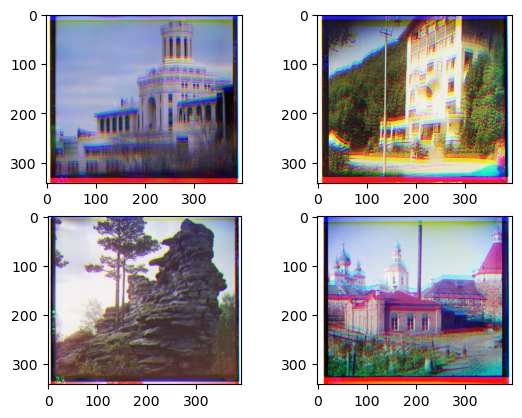

In [54]:
def stack_channels(r,g,b):
    return np.dstack((r, g, b))

fig, ax = plt.subplots(2, 2)
image = img.imread("01.jpg")
b,g,r = extract_channels(image)
rgb = stack_channels(r,g,b)
ax[0, 0].imshow(rgb)

image = img.imread("02.jpg")
b, g, r = extract_channels(image)
rgb = stack_channels(r, g, b)
ax[0, 1].imshow(rgb)

image = img.imread("03.jpg")
b, g, r = extract_channels(image)
rgb = stack_channels(r, g, b)
ax[1, 0].imshow(rgb)

image = img.imread("04.jpg")
b, g, r = extract_channels(image)
rgb = stack_channels(r, g, b)
ax[1, 1].imshow(rgb)
plt.show()

# c

--- 70.72635197639465 seconds ---


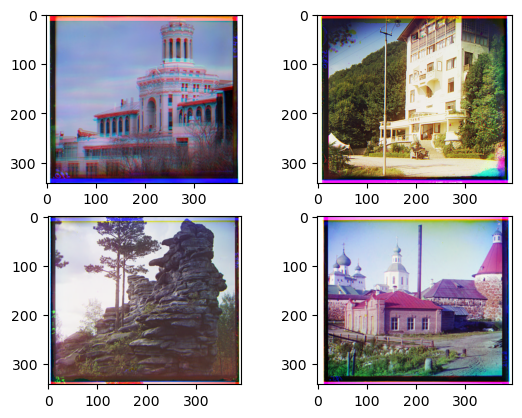

In [56]:
def corrcoef(x,y):
    return np.corrcoef(x.ravel(), y.ravel())

def align_two_matrix(mat1,mat2,low_res_search):
    original_mat1 = mat1 = mat1.copy()
    original_mat2 = mat2 = mat2.copy()
    if(low_res_search):
        mat1 = cv2.resize(mat1, dsize=(int(mat1.shape[1]/2),int(mat1.shape[0]/2)), interpolation=cv2.INTER_CUBIC)
        mat2 = cv2.resize(mat2, dsize=(int(mat2.shape[1]/2), int(mat2.shape[0]/2)), interpolation=cv2.INTER_CUBIC)
    h = 0
    v = 0
    min_similarity = 0
    for i in range(-15,+15):
        for j in range(-15,15):
            rolled_mat2 = np.roll(np.roll(mat2,i,axis=0),j,axis=1)
            similarity = np.sum(corrcoef(mat1, rolled_mat2))
            if similarity>min_similarity:
                min_similarity = similarity
                h = i
                v = j
    if low_res_search:
        return np.roll(np.roll(original_mat2, h * 2, axis=0), v * 2, axis=1)
    else:
        return np.roll(np.roll(original_mat2, h, axis=0), v, axis=1)

def align_results(r,g,b):
    r = align_two_matrix(g,r,True)
    b = align_two_matrix(g,b,True)
    r = align_two_matrix(g, r, False)
    b = align_two_matrix(g, b, False)
    return stack_channels(r,g,b)


if __name__ == "__main__":
    start_time = time.time()

    fig, ax = plt.subplots(2, 2)
    image = img.imread("01.jpg")
    b, g, r = extract_channels(image)
    rgb = align_results(r, g, b)
    ax[0, 0].imshow(rgb)
    image = img.imread("02.jpg")
    b, g, r = extract_channels(image)
    rgb = align_results(r, g, b)
    ax[0, 1].imshow(rgb)
    image = img.imread("03.jpg")
    b, g, r = extract_channels(image)
    rgb = align_results(r, g, b)
    ax[1, 0].imshow(rgb)
    image = img.imread("04.jpg")
    b, g, r = extract_channels(image)
    rgb = align_results(r, g, b)
    ax[1, 1].imshow(rgb)
    print("--- %s seconds ---" % (time.time() - start_time))
    plt.show()

# Q4

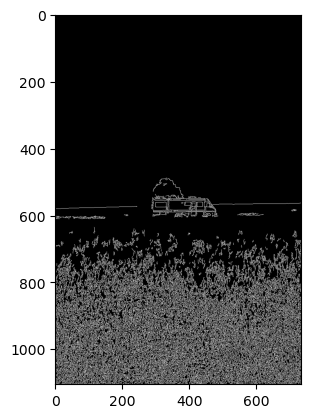

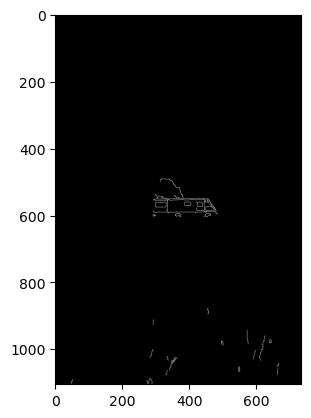

In [10]:
edge = cv2.imread('edge.jpg')
c = cv2.Canny(edge,100,250)
plt.imshow(c, cmap='gray')
plt.show()

edge = cv2.GaussianBlur(edge, (9,9), 1.35)
c = cv2.Canny(edge,100,250)
plt.imshow(c, cmap='gray')
plt.show()

# Q5

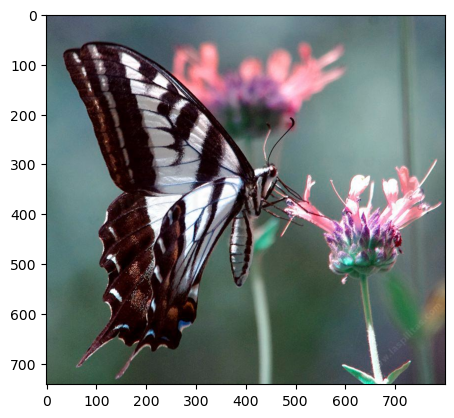

In [2]:
butterfly = cv2.imread('butterfly.jpg')
plt.imshow(butterfly)

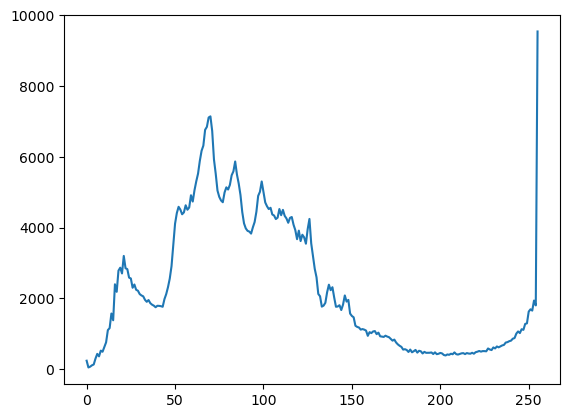

In [3]:
#calculating histogram
# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
histr = cv2.calcHist([butterfly],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

In [3]:
img_yuv = cv2.cvtColor(butterfly, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

# cv2.imwrite('equ_butterfly.jpg',img_output)

cv2.imshow('Color input image', butterfly)
cv2.imshow('Histogram equalized', img_output)

cv2.waitKey(0)

-1

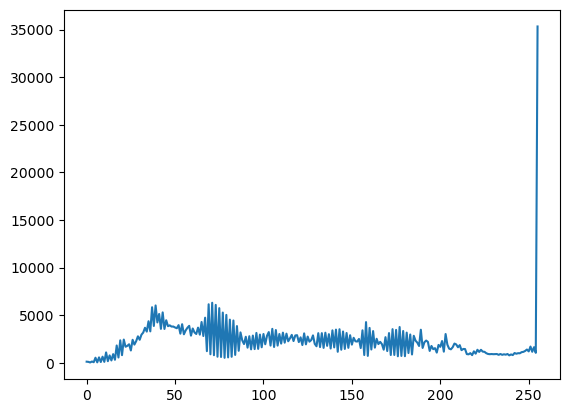

In [4]:
histr = cv2.calcHist([img_output],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

In [75]:
# function for color image equalization
def histogram_equalization(img_in):
    # segregate color streams
    b, g, r = cv2.split(img_in)
    
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    
    # calculate cdf
    cdf_b = np.cumsum(h_b)
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)

    # mask all pixels with value=0 and replace it with mean of the pixel values
    cdf_m_b = np.ma.masked_equal(cdf_b, 0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min()) * 255 / (cdf_m_b.max() - cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b, 0).astype('uint8')

    cdf_m_g = np.ma.masked_equal(cdf_g, 0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min()) * 255 / (cdf_m_g.max() - cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g, 0).astype('uint8')


    cdf_m_r = np.ma.masked_equal(cdf_r, 0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min()) * 255 / (cdf_m_r.max() - cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r, 0).astype('uint8')
    
    # merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]

    img_out = cv2.merge((img_b, img_g, img_r))
   
    # validation
    equ_b = cv2.equalizeHist(b)
    equ_g = cv2.equalizeHist(g)
    equ_r = cv2.equalizeHist(r)
    equ = cv2.merge((equ_b, equ_g, equ_r))
    # print(equ)
    # cv2.imwrite('output_name.png', equ)
    return img_out

In [76]:
equa_butterfly = histogram_equalization(img)

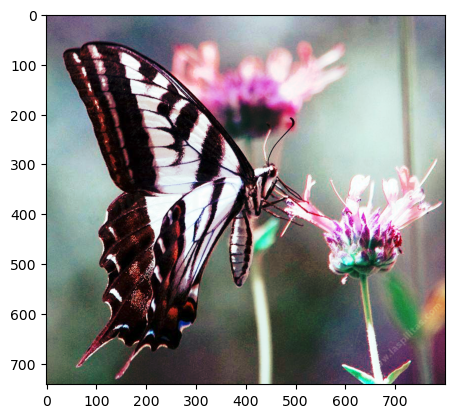

In [77]:
plt.imshow(equa_butterfly)

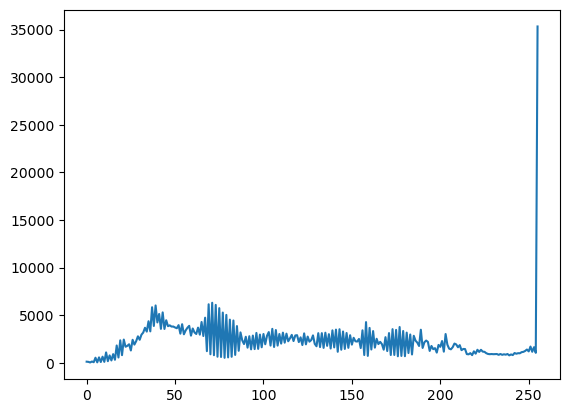

In [80]:
histr = cv2.calcHist([img_output],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()